In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version - ',np.__version__)
print('pandas version - ',pd.__version__)
print('seaborn version - ',sns.__version__)
print('matplotlib version - ',matplotlib.__version__)


import sklearn
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer, precision_recall_curve, mean_squared_error,mean_absolute_error
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.preprocessing import Binarizer
print('sklearn version - ',sklearn.__version__)

import missingno as msno 
print('missingno version - ',msno.__version__)

numpy version -  1.20.3
pandas version -  1.3.4
seaborn version -  0.11.2
matplotlib version -  3.4.3
sklearn version -  0.24.2
missingno version -  0.5.0


#### Regression (회귀)
- 회귀란 종속변수(target)과 하나 이상의 독립변수(feature)간의 관계를 모델링하는 선형 또는 비선형 접근법
- 예측이고 예측을 위해서는 종속변수의 타입은 연속된 숫자여야 한다
- 회귀분석은 데이터의 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.
- y=wx+b
- w: weight, b: bias
- cost(w,b) - 업데이트를 통해서 예측값과 실제값의 차이를 계산
- 회귀계수: coefficients -> 독립변수가 종속변수에 미치는 영향의 강도
- 회귀유형: 독립변수 1개이면 단일회귀 - 선형회귀
- 회귀유형: 독립변수 여러개면 단일회귀 - 비선형회귀

In [4]:
print('단일회귀 - ')
print()
frm = pd.DataFrame({
    "height": [1.47,1.50,1.52,1.57,1.60,1.63,1.65,1.68,1.70,1.75,1.78,1.80,1.83],
    "mass": [52.21,53.12,54.48,55.84,57.20,58.57,59.93,61.29,63.11,64.47,66.28,68.10,68.92]
})

display(frm)

단일회귀 - 



,height,mass
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.57,55.84
4,1.60,57.20
5,1.63,58.57
6,1.65,59.93
7,1.68,61.29
8,1.70,63.11
9,1.75,64.47


In [5]:
print("독립변수 또는 설명변수 - ")
print('type - ',type(frm[['height']]),frm[['height']].shape)
X = frm[['height']]

독립변수 또는 설명변수 - 
type -  <class 'pandas.core.frame.DataFrame'> (13, 1)


In [6]:
print("종속변수 - ")
print('type - ',type(frm[['mass']]),frm[['mass']].shape)
Y = frm[['mass']]

종속변수 - 
type -  <class 'pandas.core.frame.DataFrame'> (13, 1)


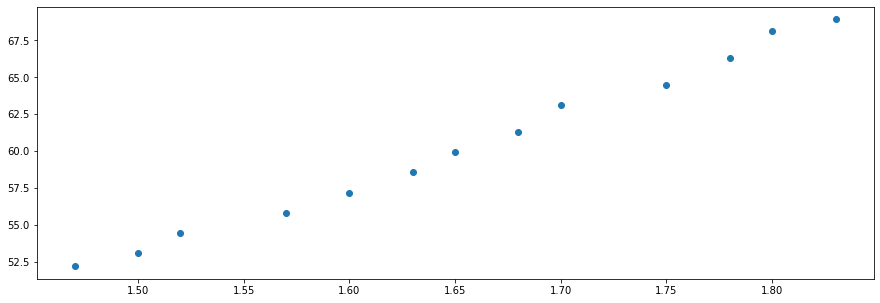

In [8]:
plt.figure(figsize=(15,5))

plt.plot(X,Y,'o')

plt.show()
plt.close()

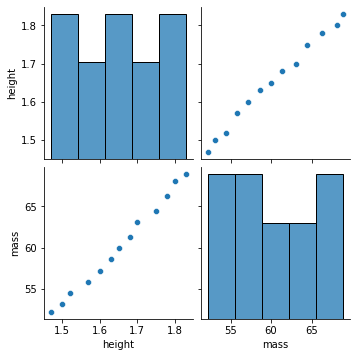

In [9]:
sns.pairplot(frm)
plt.show()
plt.close()

In [13]:
linear_model = LinearRegression()
linear_model.fit(X,Y)

print('사용자 데이터를 입력하여 예측값을 확인 - ')
user_pred = linear_model.predict([[1.79]])
print('user_pred - ',user_pred)
y_pred = linear_model.predict(X)
print('y_pred - ', y_pred)

사용자 데이터를 입력하여 예측값을 확인 - 
user_pred -  [[66.83377973]]
y_pred -  [[51.58119667]
 [53.01112633]
 [53.96441277]
 [56.34762888]
 [57.77755854]
 [59.2074882 ]
 [60.16077464]
 [61.5907043 ]
 [62.54399075]
 [64.92720685]
 [66.35713651]
 [67.31042295]
 [68.74035261]]


In [14]:
print("w = 기울기: ",linear_model.coef_)
print()
print('b = 절편: ',linear_model.intercept_)

w = 기울기:  [[47.66432207]]

b = 절편:  [-18.48535678]


In [15]:
(47.66432207*1.79) + (-18.48535678)

66.83377972529999

In [16]:
print("R - squared(결정계수) - ")
print()
print('R = ',linear_model.score(X,Y))

R - squared(결정계수) - 

R =  0.9921046478305534


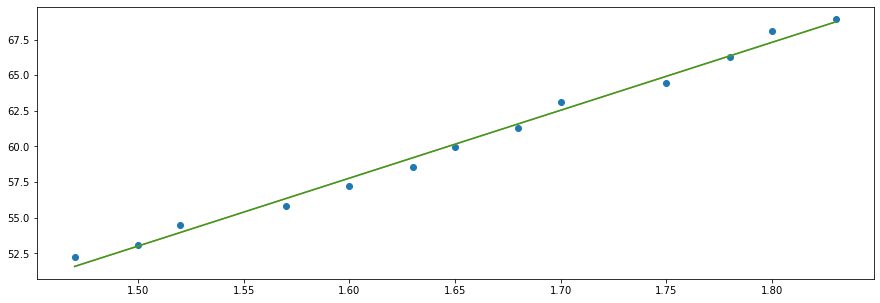

In [20]:
plt.figure(figsize=(15,5))

plt.plot(X,Y,'o')
plt.plot(X,linear_model.predict(X))
plt.plot(X,y_pred)

plt.show()
plt.close()

In [24]:
mpg_frm = pd.read_csv('./data/auto-mpg.csv',header=None)
mpg_frm.columns = ['mpg','cylinders','displacement','horsepower','weight','acc','model','origin','name']
display(mpg_frm)

,mpg,cylinders,displacement,horsepower,weight,acc,model,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [26]:
mpg_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acc           398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [27]:
mpg_frm.describe()

,mpg,cylinders,displacement,weight,acc,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [33]:
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [36]:
mpg_frm['horsepower'].replace('?',np.NaN,inplace=True)
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [38]:
mpg_frm.dropna(subset=['horsepower'],axis=0,inplace=True)
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [39]:
mpg_frm['horsepower'] = mpg_frm['horsepower'].astype('float')
mpg_frm['horsepower'].unique()

TypeError: astype() missing 1 required positional argument: 'dtype'

In [40]:
mpg_frm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    float64
 5   acc           392 non-null    float64
 6   model         392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [41]:
print('다중회귀 - ')
mpg_subset_frm = mpg_frm[['mpg', 'cylinders', 'horsepower' , 'weight']]
mpg_subset_frm

다중회귀 - 


,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
393,27.0,4,86.00,2790.0
394,44.0,4,52.00,2130.0
395,32.0,4,84.00,2295.0
396,28.0,4,79.00,2625.0


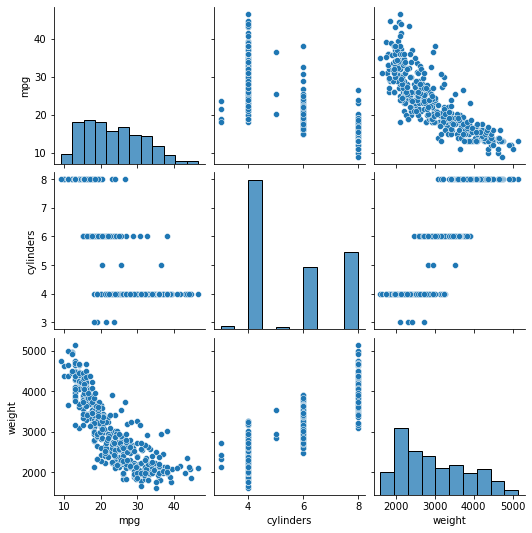

In [42]:
sns.pairplot(mpg_subset_frm)
plt.show()
plt.close()

In [43]:
print('종속변수 독립변수 분리 - ') 
print('종속변수 - ')
Y = mpg_subset_frm['mpg']
print('독립변수 - ')
X = mpg_subset_frm[['cylinders' , 'horsepower' , 'weight']] 

종속변수 독립변수 분리 - 
종속변수 - 
독립변수 - 


In [44]:
X_train, X_test , y_train, y_test = train_test_split(X, Y,
                                                     test_size = 0.2,
                                                     random_state = 111) 
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((313, 3), (79, 3), (313,), (79,))

In [45]:
mpg_linear_model = LinearRegression()
mpg_linear_model.fit(X_train, y_train)
print("w = 기울기 : " , mpg_linear_model.coef_)
print()
print('b = 절편   : ' , mpg_linear_model.intercept_)

w = 기울기 :  [-0.15188535 -0.0589312  -0.00530238]

b = 절편   :  46.34299652357524


In [46]:
print('모델의 신뢰도 - score')
r_squared = mpg_linear_model.score(X_test, y_test)
print(r_squared)

모델의 신뢰도 - score
0.7138561071545961


In [47]:
print('예측 - ')
y_pred = mpg_linear_model.predict(X_test)
y_pred

예측 - 


array([ 5.61631879,  8.89016346, 27.2669089 , 31.88069281, 23.77003928,
       31.37849609, 30.13820164, 19.94235449, 24.98243948, 24.2272539 ,
       26.6760677 , 14.3628994 , 17.07316274, 20.29093108, 22.69518569,
       27.83696941, 29.94503882,  7.3509445 , 16.34598892, 31.76450258,
       10.44191195, 29.30572823, 25.88252605, 16.37780319, 27.60231175,
       22.823972  , 26.82150912, 26.08717864, 28.6162761 , 27.89180831,
       28.47780922, 25.22563616, 18.88732413, 12.87520827, 25.33168373,
       12.12227054, 10.13846631, 15.65137735, 26.27429701, 26.736814  ,
       27.54384265, 30.27802152, 31.33956433, 24.81158265, 24.81265568,
       27.16246498, 31.20291257, 14.08536062,  7.98722991, 22.20053528,
       33.09433243, 24.08743401, 31.36789133, 19.76371842, 32.30171496,
       26.23187798, 15.39686319, 23.21073237, 29.70643179,  7.20215875,
       20.72255209,  9.07649468, 21.84983033, 29.25544374, 20.84163046,
       28.72428171, 29.30572823, 32.68498216, 30.30150824, 32.65

In [48]:
regression_actual_guess = pd.DataFrame({
    'actual' : y_test , 
    'guess'  : y_pred
})
regression_actual_guess

,actual,guess
95,12.0,5.616319
116,16.0,8.890163
273,23.9,27.266909
195,29.0,31.880693
194,22.5,23.770039
...,...,...
251,20.2,18.006986
201,18.5,19.622083
160,17.0,18.232860
210,19.0,23.531146


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


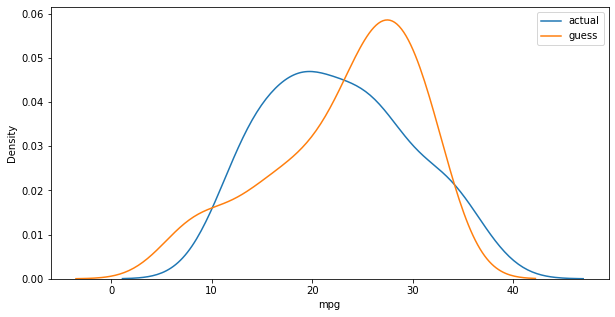

In [51]:
plt.figure(figsize=(10,5))

ax1 = sns.distplot(y_test,hist=False,label='actual')
ax2 = sns.distplot(y_pred, hist=False, label='guess')

plt.legend()
plt.show()
plt.close()

#### 주택 임대료 예측 모델 [회귀 실습 구현]
- manhattan.csv

In [52]:
house_frm = pd.read_csv('./data/manhattan.csv')
house_frm.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [54]:
house_frm.info()
house_frm.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [56]:
Y = house_frm['rent']
X = house_frm[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher']]

상관관계 분석을 위한 시각화 - 



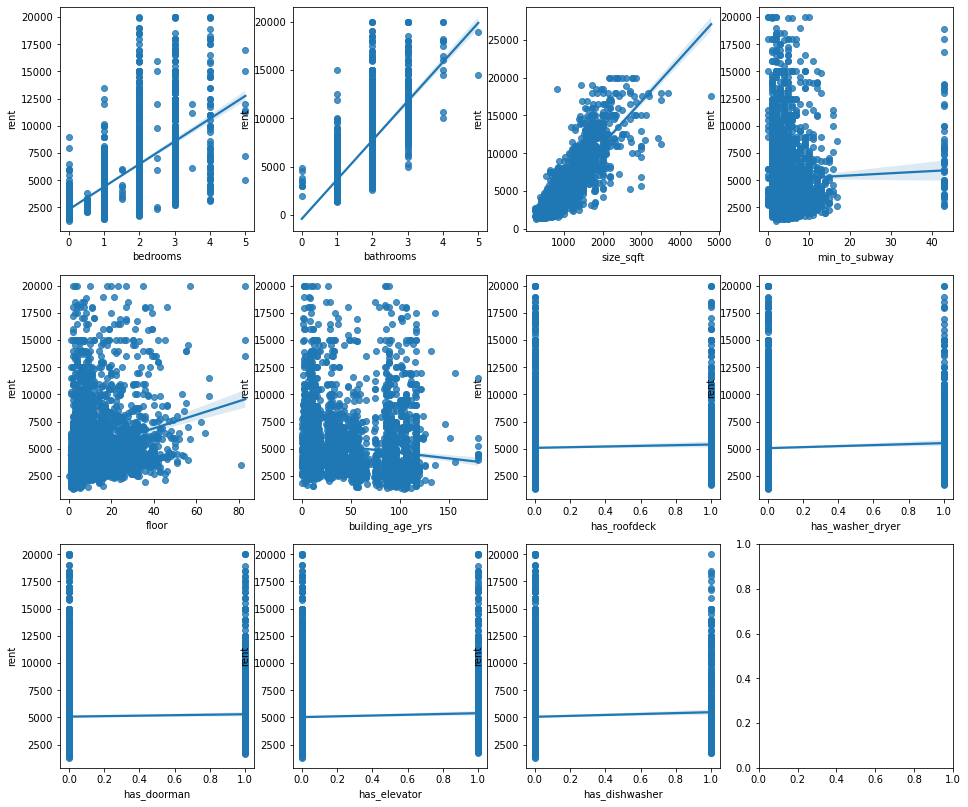

In [57]:
print('상관관계 분석을 위한 시각화 - ')
print()
fig,axs = plt.subplots(figsize=(16,14),ncols=4,nrows=3)

for idx,feature in enumerate(X):
    row = int(idx/4)
    col = idx%4
    sns.regplot(x=feature,y='rent',data=house_frm,ax=axs[row][col])

1. 데이터세트 분리
2. 모델 생성 및 학습
3. 기울기, 절편 확인
w = 기울기 :  [-304.77233305 1150.12527102    4.90935655  -19.16352889   22.4858378
   -7.4841282    -9.86394815  171.33491519  -16.79079197   -4.0750558
  -18.94474381]

b = 절편   :  -435.8877997518148
4. 모델의 신뢰도(결정계수 확인)
0.8018988812425365
5. 사용자의 데이터를 넣어서 가격 예측


array([ 3596.60089558,  6052.68721606,  3011.19748136,  4696.81414048,
        3614.13305314,  4702.19085469, 10598.93490505,  6872.66682139,
        2511.44839165,  3219.49236679,  3674.87466141,  2844.64553858,
        4456.55469209,  2885.69399155,  4918.76431606,  5698.61697444,
        3308.13189133,  9746.88942252,  3856.97287992,  2902.83049047,
        5213.65483994,  4557.73877194,  4690.29018464,  6677.55068908,
        2795.55956761,  3927.77266323,  7825.29001795,  3259.66059097,
       12673.48580889,  2173.28917341,  2713.75013881,  2266.46049768,
        2449.395847  ,  7921.11497644,  6175.69569317,  3847.46194954,
        7975.53997306,  4011.03901586,  5417.53591952,  9100.93090447,
        5286.42766291,  4460.62974789,  3741.80919602,  2228.04377682,
        4528.85986528,  3107.22227214,  7830.08415482,  6233.32285979,
        4004.01789723,  3427.87794255,  6866.13406249,  4086.90726756,
        3938.4022463 ,  5127.72659669,  3744.12886574,  6186.61503365,
      

6. 실제 임대료, 예측 임대료 프레임 구축


,actual,guess
2291,3300,3596.600896
1317,5500,6052.687216
2251,3495,3011.197481
361,4500,4696.814140
491,2900,3614.133053
...,...,...
3455,2996,3009.664227
1779,2975,3310.513258
1184,4885,4723.371153
2605,2150,2906.033524


7. scatter를 이용해서 실제임대료와 예측임대료의 분표를 확인


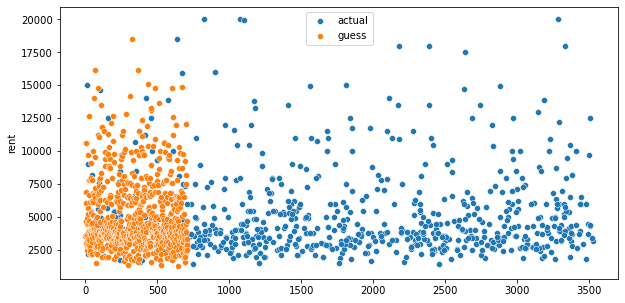

In [69]:
print('1. 데이터세트 분리')
X_train,X_test,y_train,y_test = train_test_split(X,
                                                Y,
                                                test_size=0.2,
                                                random_state=111)

print('2. 모델 생성 및 학습')
house_linear_model = LinearRegression()
house_linear_model.fit(X_train, y_train)

print('3. 기울기, 절편 확인')
print("w = 기울기 : " , house_linear_model.coef_)
print()
print('b = 절편   : ' , house_linear_model.intercept_)

print('4. 모델의 신뢰도(결정계수 확인)')
r_squared = house_linear_model.score(X_test, y_test)
print(r_squared)

print('5. 사용자의 데이터를 넣어서 가격 예측')
#my_house = [[2,1,620,10,11,12,0,0,1,0,1]]

y_pred = house_linear_model.predict(X_test)
display(y_pred)

print('6. 실제 임대료, 예측 임대료 프레임 구축')
regression_actual_guess = pd.DataFrame({
    'actual' : y_test , 
    'guess'  : y_pred
})
display(regression_actual_guess)

print('7. scatter를 이용해서 실제임대료와 예측임대료의 분표를 확인')
#plt.scatter(y_test,y_pred,alpha=0.3)
#plt.xlabel('actual')
#plt.ylabel('guess')


plt.figure(figsize=(10,5))

ax1 = sns.scatterplot(data=y_test,label='actual',)
ax2 = sns.scatterplot(data=y_pred, label='guess')

plt.legend()
plt.show()
plt.close()

In [70]:
iris = load_iris()
print('type - ',type(iris))
print('keys - ',iris.keys())

type -  <class 'sklearn.utils.Bunch'>
keys -  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [74]:
Y = pd.DataFrame(iris.target,columns=['species'])
display(Y)

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [75]:
print('독립변수 - ')
X = pd.DataFrame(data=iris.data,columns=iris.feature_names)
display(X)

독립변수 - 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [77]:
Y['species'] = Y['species'].replace([0,1,2],['setosa','versicolor','virginica'])
iris_frm = pd.concat([X,Y],axis=1)
display(iris_frm)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,vriginica
146,6.3,2.5,5.0,1.9,vriginica
147,6.5,3.0,5.2,2.0,vriginica
148,6.2,3.4,5.4,2.3,vriginica


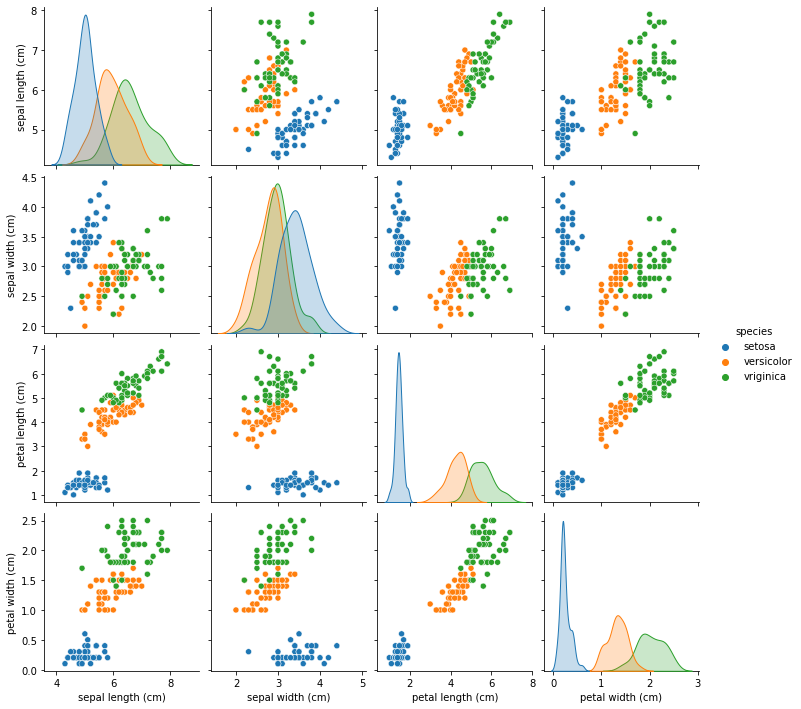

In [78]:
sns.pairplot(iris_frm,hue='species')

In [87]:
iris_frm['species'] = iris_frm['species'].replace(['setosa','versicolor','vriginica'],[0,1,2])
display(iris_frm.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [88]:
print('종속변수 - ')
Y = iris_frm['sepal length (cm)']
print('독립변수 - ')
X = iris_frm.drop('sepal length (cm)',axis=1) 

종속변수 - 
독립변수 - 


In [89]:
iris_model = LinearRegression()
iris_model.fit(X,Y)

LinearRegression()

In [90]:
r_squared = iris_model.score(X,Y)
r_squared

0.8621931701975808

In [92]:
user_pred = iris_model.predict([[4.2, 1.3, 0.2, 1]])
user_pred

array([5.13591913])

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                Y,
                                                test_size=0.2,
                                                random_state=200)


In [94]:
iris_model = LinearRegression()
iris_model.fit(X_train,y_train)

LinearRegression()

In [95]:
r_squared = iris_model.score(X,Y)
r_squared

0.8611141724044685

In [98]:
y_pred = iris_model.predict(X_test)
iris_actual_guess = pd.DataFrame({
    'actual_sepal_length': y_test,
    'guess_sepal_length':y_pred
})
iris_actual_guess

,actual_sepal_length,guess_sepal_length
84,5.4,6.269000
122,7.7,7.353844
28,5.2,4.953532
24,4.8,5.345028
75,6.6,6.233410
109,7.2,7.200091
81,5.5,5.458960
98,5.1,4.934354
80,5.5,5.494550
100,6.3,6.923196


In [101]:
print('성능평가 지표 - ')
print()
print('mae - ',mean_absolute_error(y_test,y_pred))
print('mse - ',mean_squared_error(y_test,y_pred))
print('rmse - ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R - ',iris_model.score(X_test,y_test))

성능평가 지표 - 

mae -  0.2558151623090262
mse -  0.11211610248766007
rmse -  0.3348374269517374
R -  0.8608904650947198
